Group Eleven Proposal:

Group members: Katie Archer, Noor Naila Imtinan Himam, Matthew Yeung



Title: 

<b>1. Introduction</b>
<br> - Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal 
<br> - Clearly state the question you will try to answer with your project
<br> - Identify and describe the dataset that will be used to answer the question

Pulsars are a rare type of neutron stars that blast out pulses of radiation, with intervals ranging from seconds to milliseconds. The strong magnetic fields of these neutron stars produce powerful beams of light from each end of the pole. As the pulsar rotates rapidly, the sightings of their beams occur periodically and can only be seen with large telescopes as they cross our line of sight here on Earth. 

The pulsar data set was obtained from a High Time Resolution Universe study of pulsar samples at the Parkes Observatory.
ok

- DM-SNR stands for disperion measure - signal-to-noise ratio

<b>2. Preliminary exploratory data analysis:</b>


In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
options(repr.matrix.max.rows = 10)

pulsar_data <- read_csv("pulsar_data.csv", col_names = c("mean_integrated_profile", "stand_dev_integrated_profile", "exc_kurtosis_integrated_profile", "skew_integrated_profile",
                  "mean_dmsnr", "stand_dev_dmsnr", "exc_kurtosis_dmsnr", "skew_dmsnr", "class"))
pulsar_data <- pulsar_data |> mutate(class = as_factor(class))
pulsar_data 


Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_integrated_profile, stand_dev_integrated_profile, exc_kurtosis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_integrated_profile,stand_dev_integrated_profile,exc_kurtosis_integrated_profile,skew_integrated_profile,mean_dmsnr,stand_dev_dmsnr,exc_kurtosis_dmsnr,skew_dmsnr,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
136.4297,59.84742,-0.1878456,-0.73812297,1.296823,12.16606,15.450260,285.931022,0
122.5547,49.48561,0.1279781,0.32306090,16.409699,44.62689,2.945244,8.297092,0
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0


Summarize the data in a table:

In [44]:
class_one <- pulsar_data |> 
    filter(class == "1") |>
    nrow()
class_one

class_zero <- pulsar_data |>
    filter(class == "0") |>
    nrow()
class_zero

mean_predictor_one <- pulsar_data |>
    select(skew_integrated_profile) |>
    summarize(mean = mean(skew_integrated_profile))
mean_predictor_one

mean_predictor_two <- pulsar_data |>
    select(skew_dmsnr) |>
    summarize(mean = mean(skew_dmsnr))
mean_predictor_two

#summary <- tibble(c(class_one, class_zero, missing_data, col_names = 

[1] 1639

[1] 16259

mean
<dbl>
1.770279


mean
<dbl>
104.8577


<b>2a. Create training and testing data split</b>


In [3]:
pulsar_data_split <- initial_split(pulsar_data, prop = 0.75, strata = class)
pulsar_data_train <- training(pulsar_data_split)
pulsar_data_test <- testing(pulsar_data_split) 

In [4]:
glimpse(pulsar_data_train)

Rows: 13,423
Columns: 9
$ mean_integrated_profile         <dbl> 140.56250, 102.50781, 103.01562, 136.7…
$ stand_dev_integrated_profile    <dbl> 55.68378, 58.88243, 39.34165, 57.17845…
$ exc_kurtosis_integrated_profile <dbl> -0.23457141, 0.46531815, 0.32332837, -…
$ skew_integrated_profile         <dbl> -0.69964840, -0.51508791, 1.05116443, …
$ mean_dmsnr                      <dbl> 3.1998328, 1.6772575, 3.1212375, 3.642…
$ stand_dev_dmsnr                 <dbl> 19.110426, 14.860146, 21.744669, 20.95…
$ exc_kurtosis_dmsnr              <dbl> 7.975532, 10.576487, 7.735822, 6.89649…
$ skew_dmsnr                      <dbl> 74.24222, 127.39358, 63.17191, 53.5936…
$ class                           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [5]:
glimpse(pulsar_data_test)

Rows: 4,475
Columns: 9
$ mean_integrated_profile         <dbl> 119.4844, 133.2578, 138.1797, 114.3672…
$ stand_dev_integrated_profile    <dbl> 48.76506, 44.05824, 51.52448, 51.94572…
$ exc_kurtosis_integrated_profile <dbl> 0.031460220, -0.081059862, -0.03185232…
$ skew_integrated_profile         <dbl> -0.11216757, 0.11536151, 0.04679717, -…
$ mean_dmsnr                      <dbl> 0.9991639, 1.6321070, 6.3302676, 2.738…
$ stand_dev_dmsnr                 <dbl> 9.279612, 12.007806, 31.576347, 17.191…
$ exc_kurtosis_dmsnr              <dbl> 19.2062302, 11.9720666, 5.1559399, 9.0…
$ skew_dmsnr                      <dbl> 479.756567, 195.543448, 26.143310, 96.…
$ class                           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


<b>2b. Summarize the data in at least one table </b>

<b>2c. Visualization of Distributions of each of the predictor variables</b>


In [6]:
library(ggplot2) 
library(tidyr)

In [7]:
pulsar_train_var <- select(pulsar_data, mean_integrated_profile:skew_dmsnr)
pulsar_train_dist<- pulsar_train_var|>
                    pivot_longer(colnames(pulsar_train_var)) |>
                    as.data.frame()
pulsar_train_dist

name,value
<chr>,<dbl>
mean_integrated_profile,140.5625000
stand_dev_integrated_profile,55.6837821
exc_kurtosis_integrated_profile,-0.2345714
skew_integrated_profile,-0.6996484
mean_dmsnr,3.1998328
⋮,⋮
skew_integrated_profile,0.08951971
mean_dmsnr,188.30602010
stand_dev_dmsnr,64.71256228


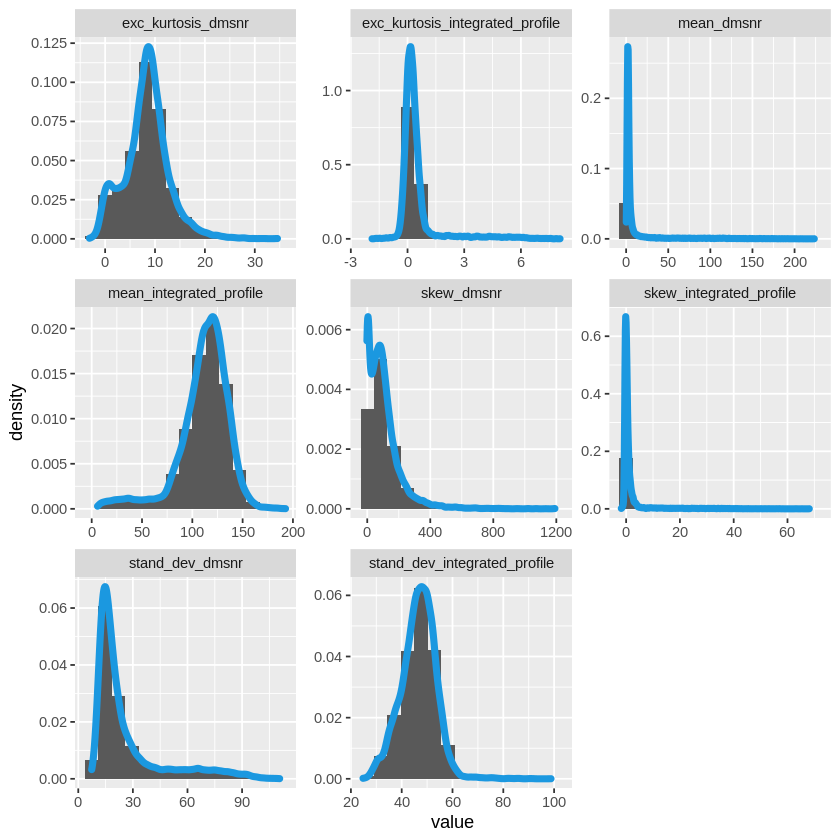

In [8]:
ggp3 <- ggplot(pulsar_train_dist, aes(x = value)) +    # Draw histogram & density
  geom_histogram(aes(y = ..density..),bins=15) + 
  geom_density(col = "#1b98e0", size = 2) + 
  facet_wrap(~ name, scales = "free")
ggp3

Plots of each variable against the class variable (whether the pulsar is real). A class value of "1" corresponds to a real pulsar, whilst a value of "0" corresponds to a false candidate (radio frequency interference or noise):

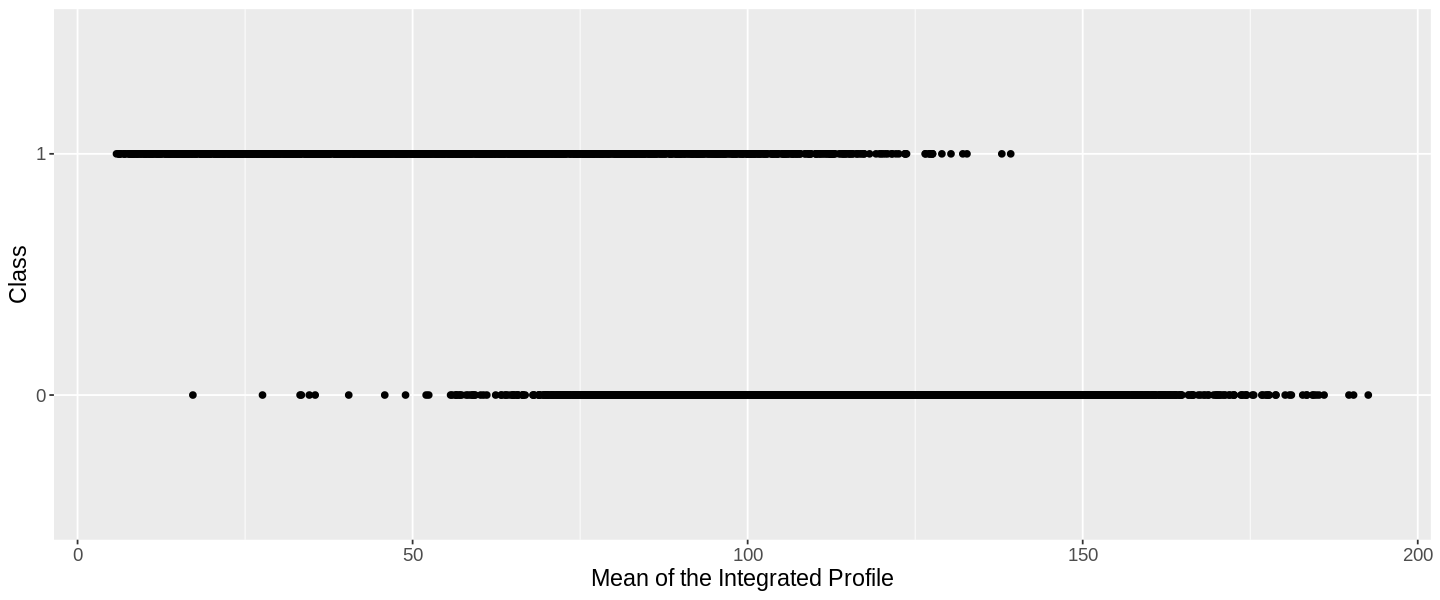

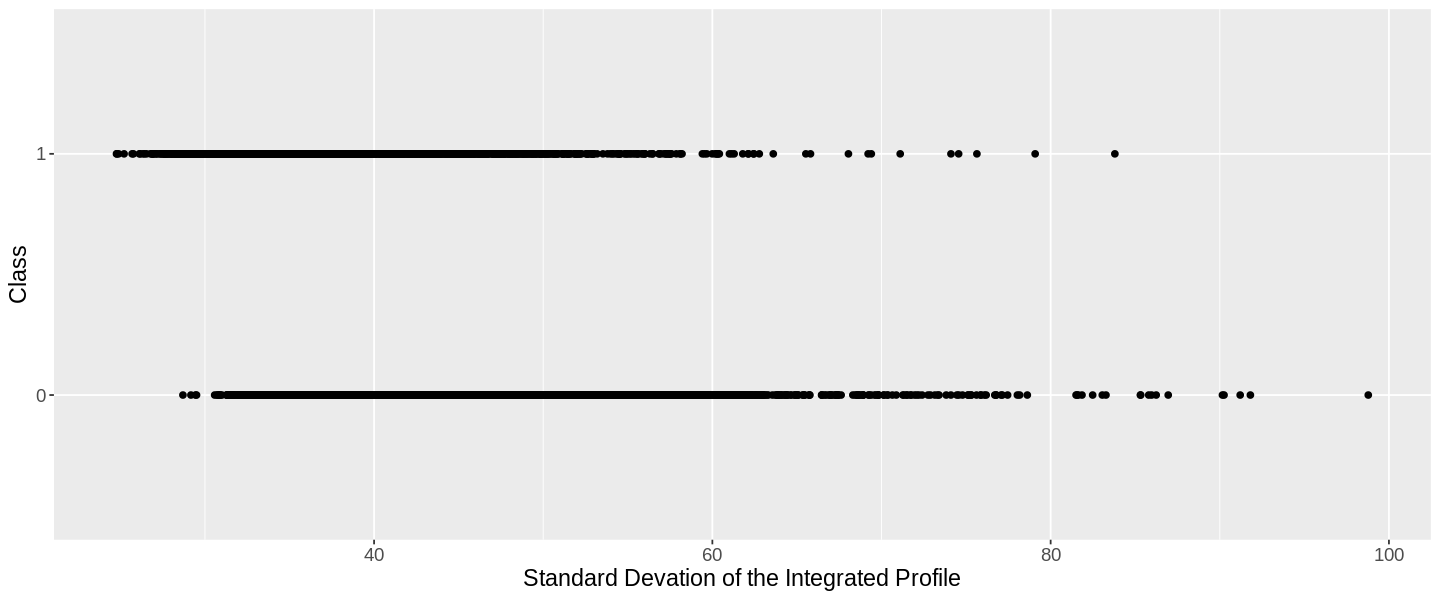

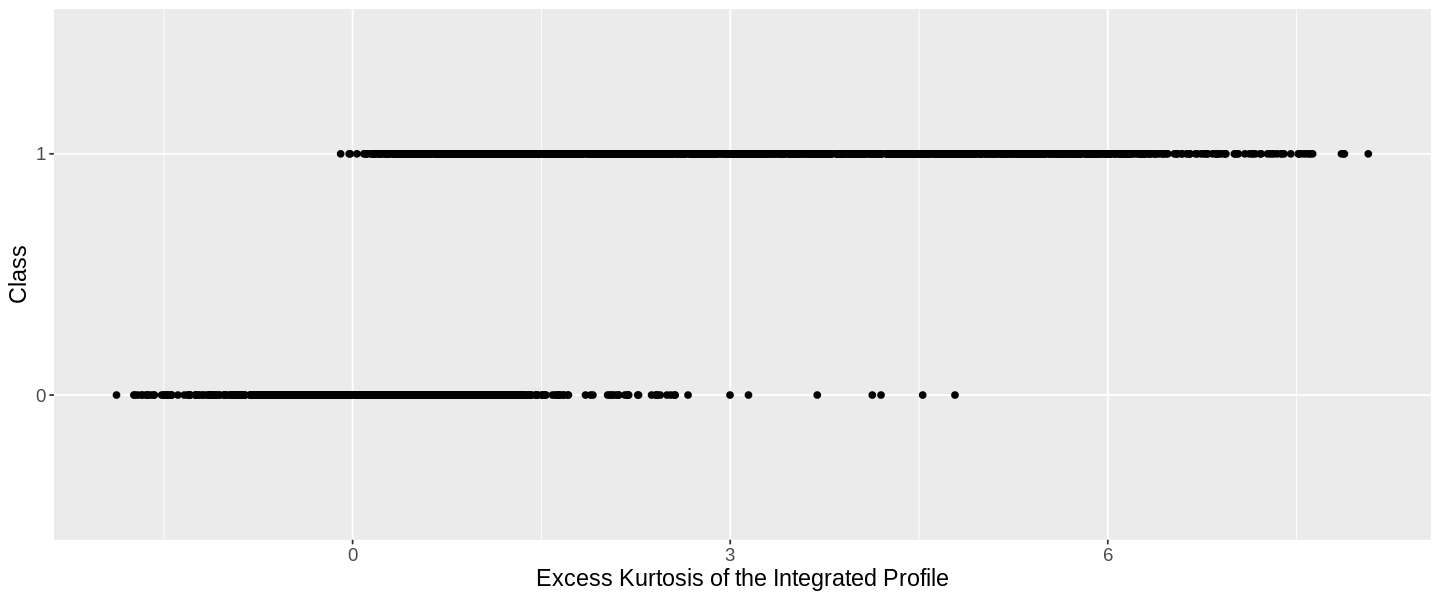

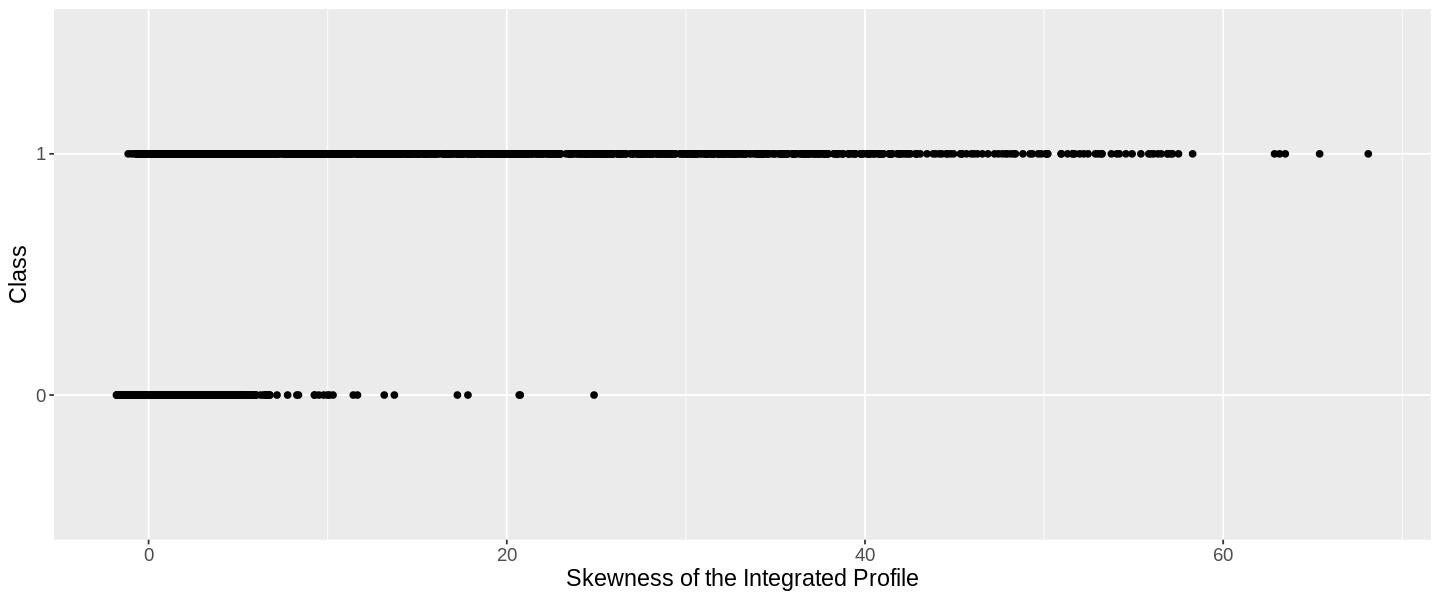

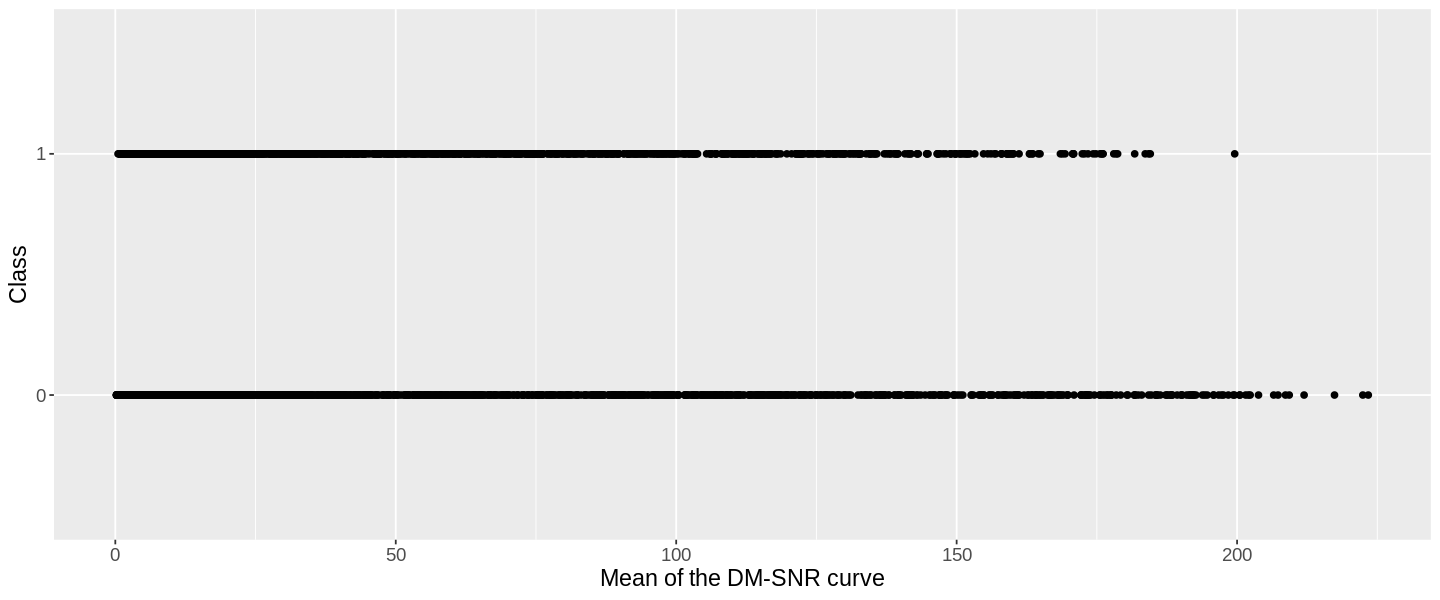

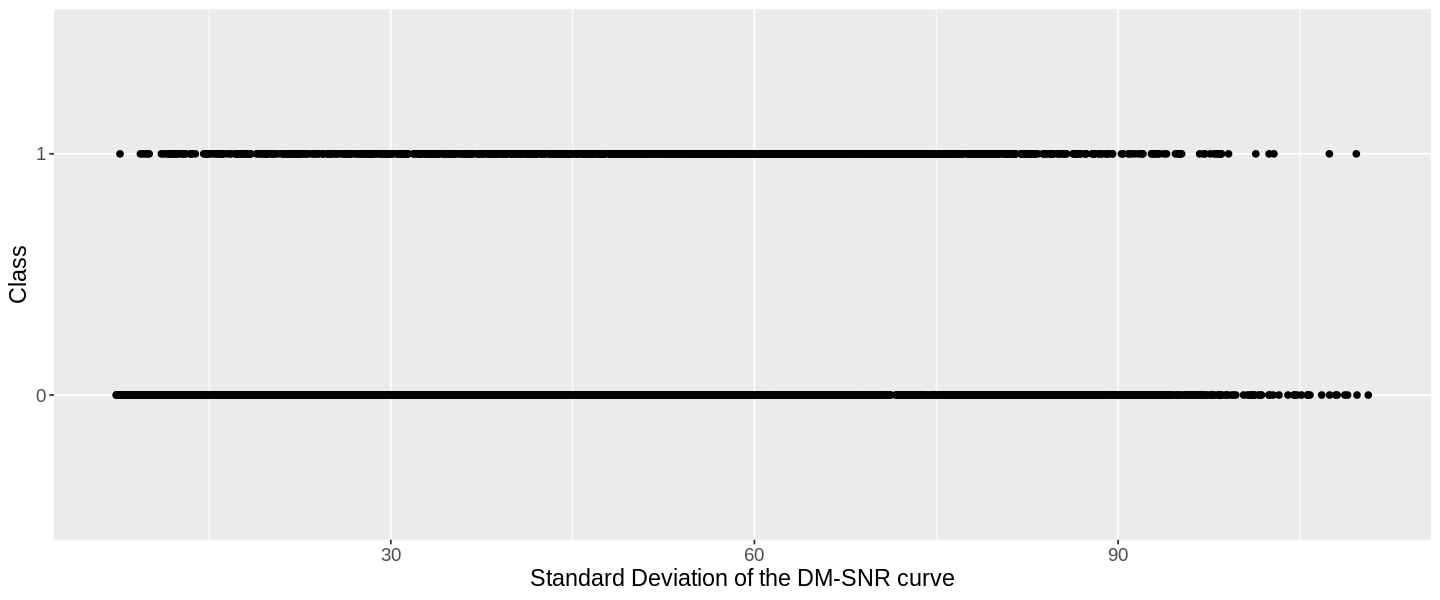

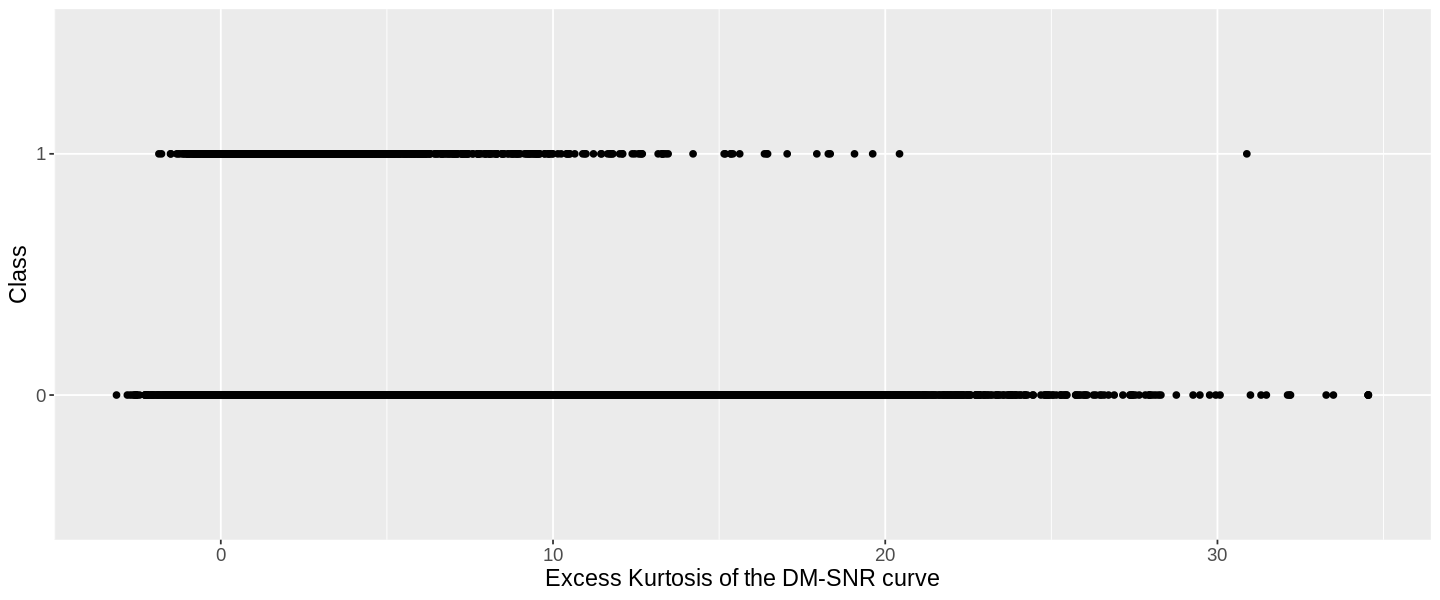

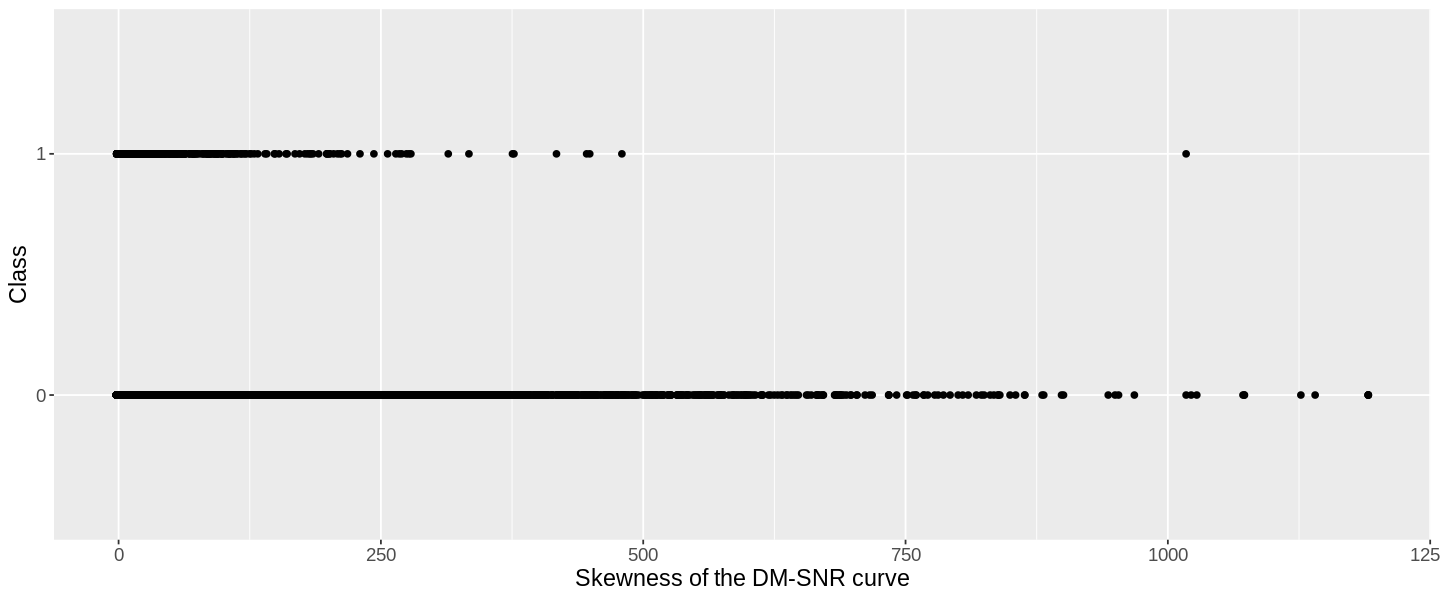

In [16]:
options(repr.plot.width = 12, repr.plot.height = 5)

#variable 1
mean_int_prof_plot <- pulsar_data |>
    ggplot(aes(x = mean_integrated_profile, y = class)) +
    geom_point() +
    labs(x = "Mean of the Integrated Profile", y = "Class") +
    theme(text = element_text(size = 14))
mean_int_prof_plot

#variable 2
stand_dev_int_plot <- pulsar_data |>
    ggplot(aes(x = stand_dev_integrated_profile, y = class)) +
    geom_point() +
    labs(x = "Standard Devation of the Integrated Profile", y = "Class") +
    theme(text = element_text(size = 14))
stand_dev_int_plot

#variable 3
exc_kurt_int_plot <- pulsar_data |>
    ggplot(aes(x = exc_kurtosis_integrated_profile, y = class)) +
    geom_point() +
    labs(x = "Excess Kurtosis of the Integrated Profile", y = "Class") +
    theme(text = element_text(size = 14))
exc_kurt_int_plot

#variable 4
skew_int_plot <- pulsar_data |>
    ggplot(aes(x = skew_integrated_profile, y = class)) +
    geom_point() +
    labs(x = "Skewness of the Integrated Profile", y = "Class") +
    theme(text = element_text(size = 14))
skew_int_plot

#variable 5
mean_dmsnr_plot <- pulsar_data |>
    ggplot(aes(x = mean_dmsnr, y = class)) +
    geom_point() +
    labs(x = "Mean of the DM-SNR curve", y = "Class") +
    theme(text = element_text(size = 14))
mean_dmsnr_plot

#variable 6
dev_dmsnr_plot <- pulsar_data |>
    ggplot(aes(x = stand_dev_dmsnr, y = class)) +
    geom_point() +
    labs(x = "Standard Deviation of the DM-SNR curve", y = "Class") +
    theme(text = element_text(size = 14))
dev_dmsnr_plot

#variable 7
exc_kurt_dmsnr_plot <- pulsar_data |>
    ggplot(aes(x = exc_kurtosis_dmsnr, y = class)) +
    geom_point() +
    labs(x = "Excess Kurtosis of the DM-SNR curve", y = "Class") +
    theme(text = element_text(size = 14))
exc_kurt_dmsnr_plot

#variable 8
skew_dmsnr_plot <- pulsar_data |>
    ggplot(aes(x = skew_dmsnr, y = class)) +
    geom_point() +
    labs(x = "Skewness of the DM-SNR curve", y = "Class") +
    theme(text = element_text(size = 14))
skew_dmsnr_plot

For our predictors, we will choose at least 1 variable for each the integrated profile and the DM-SNR curve, because both are used to distinguish between real pulsar stars and radio frequency interference. Looking at the above plots, we will start with the skewness of the integrated profile and skewness of the DM-SNR curve as the predictors in our classification model. We are choosing the skewness for both the integrated profile and the DM-SNR curve because there is the least amount of overlap for which values of skewness may classify a candidate as a real pulsar or not.